# Modeling HW - Cam Pitcher

## Import Packages and Data

In [236]:
## import packages

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn import metrics


In [237]:
## import data 
data = pd.read_csv('./marketing_modified.csv')
data

#https://www.kaggle.com/rodsaldanha/arketing-campaign

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58.0,...,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38.0,...,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26.0,...,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,NaN,...,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94.0,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2235,10870,1967,Graduation,NaN,61223.0,0,1,2013-06-13,46.0,...,5,0,0,0,0,0,0,3,11,0
2236,2236,4001,1946,PhD,NaN,64014.0,2,1,2014-06-10,56.0,...,7,0,0,0,1,0,0,3,11,0
2237,2237,7270,1981,NaN,Divorced,56981.0,0,0,2014-01-25,91.0,...,6,0,1,0,0,0,0,3,11,0
2238,2238,8235,1956,Master,NaN,69245.0,0,1,2014-01-24,8.0,...,3,0,0,0,0,0,0,3,11,0


#### Drop the "Unnamed: 0" column (row number)

In [238]:
data = data.drop(columns=('Unnamed: 0'))

# Exploratory Data Analysis

## Check for missing values

In [239]:
#make a copy of the base data to modify
modified_data = data.copy(deep = True)

#### What's missing??

In [240]:
len(modified_data) - modified_data.count()

ID                       0
Year_Birth               0
Education              148
Marital_Status         597
Income                 369
Kidhome                  0
Teenhome                 0
Dt_Customer              0
Recency                407
MntWines                 0
MntFruits                0
MntMeatProducts          0
MntFishProducts          0
MntSweetProducts         0
MntGoldProds             0
NumDealsPurchases        0
NumWebPurchases          0
NumCatalogPurchases      0
NumStorePurchases        0
NumWebVisitsMonth        0
AcceptedCmp3             0
AcceptedCmp4             0
AcceptedCmp5             0
AcceptedCmp1             0
AcceptedCmp2             0
Complain                 0
Z_CostContact            0
Z_Revenue                0
Response                 0
dtype: int64

It's a good thing that there aren't any missing IDs.

### Check type of variables

In [241]:
print(modified_data.dtypes)

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                float64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object


#### Check for duplicate IDs

In [242]:
print(len(modified_data['ID']) - len(modified_data['ID'].unique()))

0


Since there aren't any duplicate IDs, we can remove this column

In [243]:
modified_data = modified_data.drop(columns=('ID'))

## Check out the object datatypes

### Check the unique values of our object datatypes (make sure they should be objects)

In [244]:
#grab all objects
objects = modified_data.select_dtypes(include = ['object']).columns.to_list()

print(modified_data[objects].apply(lambda col: col.unique()))

Education           [Graduation, PhD, Master, Basic, nan, 2n Cycle]
Marital_Status    [Single, Together, Married, Divorced, nan, Wid...
Dt_Customer       [2012-09-04, 2014-03-08, 2013-08-21, 2014-02-1...
dtype: object


In [245]:
for c in modified_data[objects].columns:
    print("---- %s ---" % c)
    print(modified_data[c].value_counts(dropna=False))

---- Education ---
Graduation    1059
PhD            447
Master         345
2n Cycle       191
NaN            148
Basic           50
Name: Education, dtype: int64
---- Marital_Status ---
Married     635
NaN         597
Together    424
Single      358
Divorced    166
Widow        57
YOLO          2
Alone         1
Name: Marital_Status, dtype: int64
---- Dt_Customer ---
2012-08-31    12
2012-09-12    11
2013-02-14    11
2014-05-12    11
2013-08-20    10
              ..
2012-08-05     1
2012-11-18     1
2013-05-25     1
2013-04-14     1
2014-01-09     1
Name: Dt_Customer, Length: 663, dtype: int64


### Fix Marital Status


- YOLO isn't a real/valid marital status, and alone can be combined with Single. 
- Together is a little ambiguous, but since it has plenty of entries I won't worry about it

In [246]:
modified_data['Marital_Status'] = [float('NaN') if status == 'YOLO' else status for status in modified_data.Marital_Status]
modified_data['Marital_Status'] = ['Single' if status == 'Alone' else status for status in modified_data.Marital_Status]

modified_data['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', nan, 'Widow'],
      dtype=object)

### Check Factor Levels

In [247]:
for c in modified_data[objects].columns:
    print("---- %s ---" % c)
    print(modified_data[c].value_counts(dropna=False))

---- Education ---
Graduation    1059
PhD            447
Master         345
2n Cycle       191
NaN            148
Basic           50
Name: Education, dtype: int64
---- Marital_Status ---
Married     635
NaN         599
Together    424
Single      359
Divorced    166
Widow        57
Name: Marital_Status, dtype: int64
---- Dt_Customer ---
2012-08-31    12
2012-09-12    11
2013-02-14    11
2014-05-12    11
2013-08-20    10
              ..
2012-08-05     1
2012-11-18     1
2013-05-25     1
2013-04-14     1
2014-01-09     1
Name: Dt_Customer, Length: 663, dtype: int64


There are not balanced levels in our factors, most notably:

- There are ~12x more Married than Widow
- There are ~20x more Graduation than Basic

## Check the spread/distribution of our numerical datatypes

In [248]:
numerical_features = modified_data.select_dtypes(include = ['float64', 'int64']).columns.to_list()
print(numerical_features)

['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']


### See if any of the numerical columns are actually categorical features

In [249]:
#print column value counts for lists with 10 or fewer elements
for c in modified_data[numerical_features].columns:
    if (len(modified_data[c].value_counts(dropna=False)) < 10):
        print("---- %s ---" % c)
        print(modified_data[c].value_counts(dropna=False))

---- Kidhome ---
0    1293
1     899
2      48
Name: Kidhome, dtype: int64
---- Teenhome ---
0    1158
1    1030
2      52
Name: Teenhome, dtype: int64
---- AcceptedCmp3 ---
0    2077
1     163
Name: AcceptedCmp3, dtype: int64
---- AcceptedCmp4 ---
0    2073
1     167
Name: AcceptedCmp4, dtype: int64
---- AcceptedCmp5 ---
0    2077
1     163
Name: AcceptedCmp5, dtype: int64
---- AcceptedCmp1 ---
0    2096
1     144
Name: AcceptedCmp1, dtype: int64
---- AcceptedCmp2 ---
0    2210
1      30
Name: AcceptedCmp2, dtype: int64
---- Complain ---
0    2219
1      21
Name: Complain, dtype: int64
---- Z_CostContact ---
3    2240
Name: Z_CostContact, dtype: int64
---- Z_Revenue ---
11    2240
Name: Z_Revenue, dtype: int64
---- Response ---
0    1906
1     334
Name: Response, dtype: int64


##### Z_CostContact isn't showing up for some reason

In [250]:
modified_data['Z_CostContact'].value_counts()

3    2240
Name: Z_CostContact, dtype: int64

##### All values in Z_CostContact are the same. Let's drop it

In [251]:
modified_data = modified_data.drop(columns=('Z_CostContact'))
numerical_features.remove('Z_CostContact')

#### Can we combine AcceptedCmp1-5 into one column?

Can you only have a positive response in one of these columns?

In [252]:
accepted_cmp = ["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5"]
modified_data[accepted_cmp].value_counts()

AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5
0             0             0             0             0               1777
                            1             0             0                129
                            0             1             0                 84
                                          0             1                 59
1             0             0             0             0                 52
0             0             0             1             1                 24
1             0             0             1             1                 23
                                          0             1                 21
                                          1             0                 14
                            1             0             1                 13
                                                        0                  8
              1             0             1             1                  8
0      

It looks like there isn't exclusivity between columns. Since all 5 columns are binary, instead we'll make them into yes/no object columns.

Z-Revenue has nothing

In [253]:
modified_data = modified_data.drop(columns=('Z_Revenue'))
numerical_features.remove('Z_Revenue')

##### Response, Complain and the AcceptedCmp1-5 are all Binary (yes/no). We need to change those to be categorical.

In [254]:
toCategorical = ['Response', 'Complain']
toCategorical.extend(accepted_cmp)
toCategorical

['Response',
 'Complain',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5']

In [255]:
for c in modified_data[toCategorical].columns:
    modified_data[c] = ['Yes' if num == 1.0 else 'No' if num == 0.0 else None for num in modified_data[c]]

    modified_data[c].unique()

    objects.append(c)
    toCategorical.remove(c)
    numerical_features.remove(c)


It shoud be noted that the factor levels are very unbalanced for all 7 of the variables we just reclassified. Complaints specifically is concerning with only 21 complaints filed. We'll leave this for now

##### We can make a new column, called Dependenthome, which adds together Kidhome and Teenhome (covering different categories)

In [256]:
# modified_data['Dependenthome'] = modified_data['Kidhome'] + modified_data["Teenhome"]
# numerical_features.append('Dependenthome')

In [257]:
numerical_features

['Year_Birth',
 'Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth']

In [258]:
objects

['Education',
 'Marital_Status',
 'Dt_Customer',
 'Response',
 'Complain',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5']

### What is the spread of the numerical data??

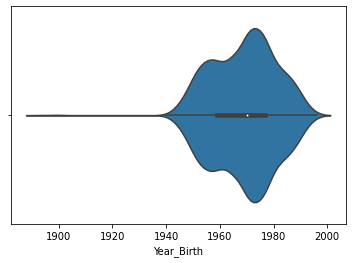

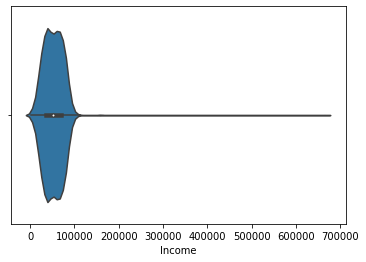

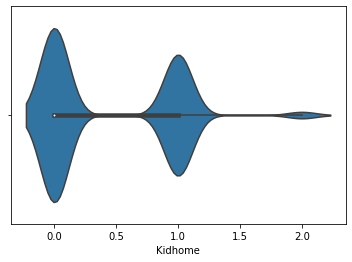

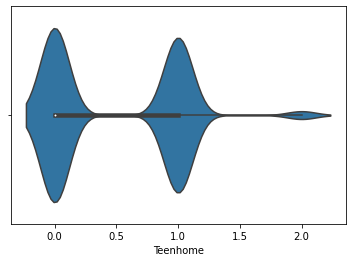

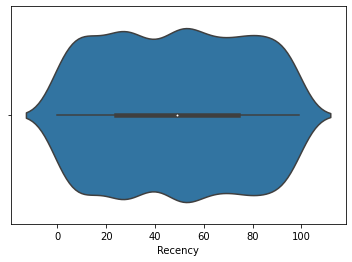

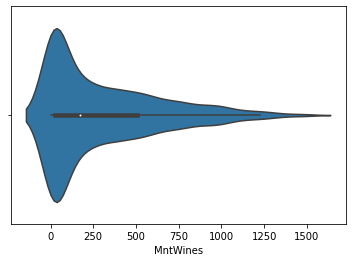

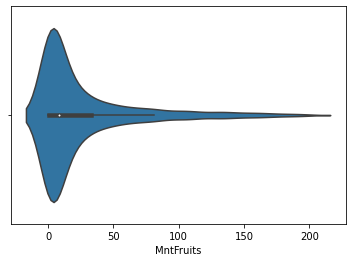

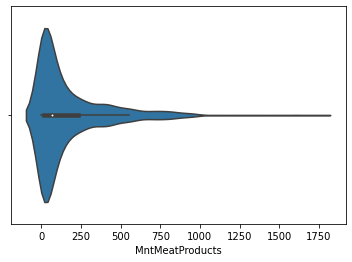

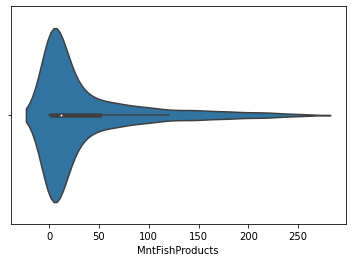

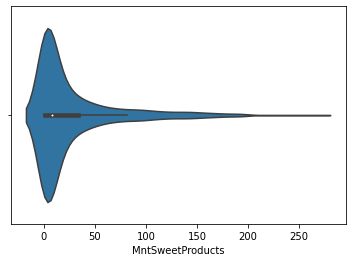

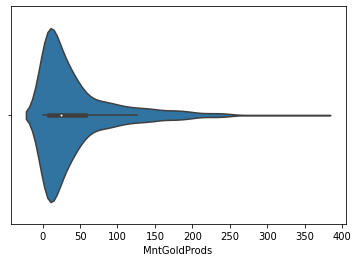

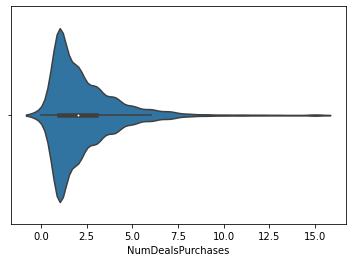

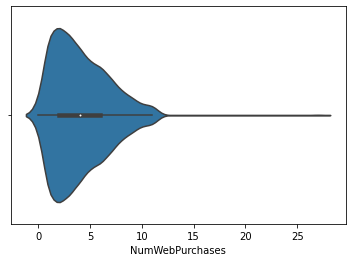

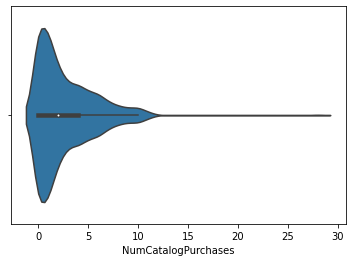

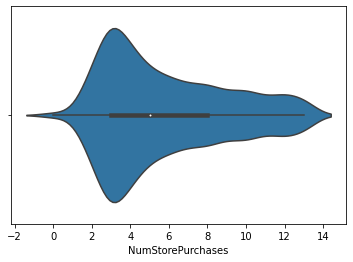

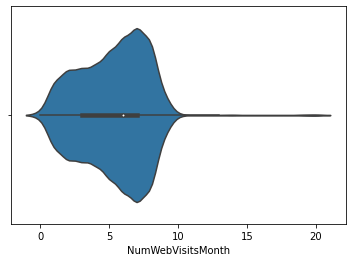

In [259]:
for col in modified_data[numerical_features]:
    plt.figure()
    sns.violinplot(x=modified_data[col])

Most of these look fine to me, I am not sure if kidhome/dependenthome/teenhome need to be put as categorical but since they do scale numerically I'm leaving them in for now

### Checking up on all the variable types again

In [260]:
modified_data.dtypes

Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                float64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3            object
AcceptedCmp4            object
AcceptedCmp5            object
AcceptedCmp1            object
AcceptedCmp2            object
Complain                object
Response                object
dtype: object

Looking good, now we just need to take care of the missing values in Recency, Education, Marital Status, and Income.

## Missing Values

For Education and Marital Status, since they are categorical, I'll create an "Undisclosed" category since I don't feel comfortable imputing categorical data here.

### Replacing NaN with "Unknown" in Education and Marital Status

In [261]:
modified_data[['Education', 'Marital_Status']] = modified_data[['Education', 'Marital_Status']].fillna('Unknown')

for c in modified_data[['Education', 'Marital_Status']].columns:
    print("---- %s ---" % c)
    print(modified_data[c].value_counts(dropna=False))

---- Education ---
Graduation    1059
PhD            447
Master         345
2n Cycle       191
Unknown        148
Basic           50
Name: Education, dtype: int64
---- Marital_Status ---
Married     635
Unknown     599
Together    424
Single      359
Divorced    166
Widow        57
Name: Marital_Status, dtype: int64


### Imputing Numerical Values for Recency and Income

Let's check out the correlation between the columns to see which ones we can use to impute

In [262]:
modified_data.corr()[['Income', 'Recency']]

,Income,Recency
Year_Birth,-0.152495,-0.019487
Income,1.000000,-0.001940
Kidhome,-0.420792,0.021269
Teenhome,0.011395,0.006421
Recency,-0.001940,1.000000
MntWines,0.582312,0.026323
MntFruits,0.438016,0.000888
MntMeatProducts,0.577148,0.019421
MntFishProducts,0.439903,0.007188
MntSweetProducts,0.441515,0.032679


It looks like a lot of the purchase related variables are related to income, let's use those to impute income.

In [263]:
#https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html

# initialized values at mean
imp_mean= IterativeImputer(random_state = 0)
imp_mean = imp_mean.fit(modified_data[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','Income' ]])
X = modified_data.loc[modified_data['Income'].isnull(), ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','Income' ]]
imp_mean.transform(X)
print(imp_mean.transform(X).mean())

print(modified_data[['Income']].mean())


5135.21976195488
Income    52247.32977
dtype: float64


This imputation didn't turn out well at all... the average is 5000 of the imputation and the average income is 52247. Let's just use the mean for the blank values in Income and Recency

In [264]:
modified_data['Income'].fillna(value=modified_data['Income'].mean(), inplace=True)
modified_data['Recency'].fillna(value=modified_data['Recency'].mean(), inplace=True)
len(modified_data) - modified_data.count()

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64

## K Nearest Neighbors

I chose K nearest neighbors for my first model because our dataset is relatively small (but not super small) and because most of our numeric data has a somewhat normal (or at least unimodal) shape with few outliars so this model has potential to be pretty accurate

#### Format the dataset and encode

I'm going to drop Education, Marital Status, and Dt_Customer to keep the model and encoding simpler

In [265]:
replace_dict = {"Yes" : 1, "No" : 0}
encoded_data = modified_data.drop(['Education','Marital_Status','Dt_Customer'], axis = 1).replace(replace_dict)

#set response variable
target = encoded_data.Response
X = encoded_data.drop(['Response'], axis = 1)

In [266]:
# Get 20% test and 80% train
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=134)


In [267]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

Let's check our accuracy on this

In [268]:
metrics.accuracy_score(y_test, y_pred)

0.8348214285714286

Not awful! (You will have to take the non-binary predictions and round them to 0 or 1)

## Logistic Regression

I chose to run a logistic regression for my second model because it has a binary output (like our response variable). It's not a model that frequently overfits which is also helpful for some of the factors that are imbalanced

We'll use the same train and test data as above

In [269]:
target = modified_data.Response
X = encoded_data.drop(['Response'], axis = 1)

X = pd.get_dummies(X)

In [270]:
logreg = LogisticRegression(max_iter=3000)

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

In [271]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8660714285714286
Precision: 0.625
Recall: 0.15625


This model seems to work a little better than the other one 

## Conclusion

Both models work decently, but they could be improved if the missing values were imputed in a better way, or collected from the start. I would also gather more data points to help increase accuracy and help mitigate the imbalance in the factors in the data.

## Pickle the Model

In [272]:
import joblib

In [273]:
joblib.dump(logreg , 'CamPitcherLogReg_jlib')
joblib.dump(knn, 'CamPitcherKnn_jlib')

['CamPitcherKnn_jlib']

In [274]:
# opening the file- model_jlib
#m_jlib = joblib.load('model_jlib')